# Configuration

In [1]:
!/emr/notebook-env/bin/pip3 install --upgrade -i https://mirrors.ustc.edu.cn/pypi/web/simple numpy
!/emr/notebook-env/bin/pip3 install -i https://mirrors.ustc.edu.cn/pypi/web/simple matplotlib
!/emr/notebook-env/bin/pip3 install -i https://mirrors.ustc.edu.cn/pypi/web/simple joblib
!/emr/notebook-env/bin/pip3 install -i https://mirrors.ustc.edu.cn/pypi/web/simple pyspark==3.1.1
!/emr/notebook-env/bin/pip3 install -i https://mirrors.ustc.edu.cn/pypi/web/simple sklearn
!/emr/notebook-env/bin/pip3 install -i https://mirrors.ustc.edu.cn/pypi/web/simple scikit-learn
!/emr/notebook-env/bin/pip3 install -i https://mirrors.ustc.edu.cn/pypi/web/simple lightgbm
!/emr/notebook-env/bin/pip3 install -i https://mirrors.ustc.edu.cn/pypi/web/simple PyArrow
!/emr/notebook-env/bin/pip3 install -i https://mirrors.ustc.edu.cn/pypi/web/simple scikit-plot
!/emr/notebook-env/bin/pip3 install -i https://mirrors.ustc.edu.cn/pypi/web/simple cython
!/emr/notebook-env/bin/pip3 install -i https://mirrors.ustc.edu.cn/pypi/web/simple pandas
!/emr/notebook-env/bin/pip3 install -i https://mirrors.ustc.edu.cn/pypi/web/simple findspark

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://mirrors.ustc.edu.cn/pypi/web/simple
     |████████████████████████████████| 15.7 MB 12.2 MB/s eta 0:00:01    |██████▉                         | 3.4 MB 12.2 MB/s eta 0:00:02
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.4
    Uninstalling numpy-1.21.4:
      Successfully uninstalled numpy-1.21.4
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
hdijupyterutils 0.18.0 requires jupyter>=1, which is not installed.
hdijupyterutils 0.18.0 requires mock, which is not installed.
hdijupyterutils 0.18.0 requires nose, which is not installed.
Defaulting to user installation because normal site-packages is not writeable
Looking i

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://mirrors.ustc.edu.cn/pypi/web/simple
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://mirrors.ustc.edu.cn/pypi/web/simple
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://mirrors.ustc.edu.cn/pypi/web/simple


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import sys, random, math, os, time, glob
from datetime import datetime, date, timedelta
import pytz
from dateutil.relativedelta import *
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd
import logging
from collections import namedtuple, deque
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 5000)
pd.options.display.float_format = '{:,.2f}'.format
# pd.set_option('display.width', 1000)

if 0:
    import torch
    import torch.nn as nn
    import torch.optim as optim
    from torch.optim import Adam
    import torch.nn.functional as TF
    from torch.autograd import Variable
    from torch.distributions.categorical import Categorical
    torch.set_printoptions(precision=3)

np.set_printoptions(suppress=True, precision=5)
time_format = 'yyyy-MM-dd'
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import DateType, StructType, StructField, IntegerType
from pyspark.sql.window import Window
from pyspark.sql.functions import when, row_number, expr, concat, format_number, avg, isnan, weekofyear, rand
from pyspark.ml.feature import Bucketizer, VectorAssembler
from pyspark.ml.regression import LinearRegression as ml_LinearRegression 
from pyspark.sql import DataFrameStatFunctions as statFunc
from pyspark.sql.functions import to_timestamp
from pyspark.sql.functions import collect_set, col, count
from pyspark.ml.fpm import FPGrowth

In [5]:
from sklearn.preprocessing import StandardScaler as sk_StandardScaler
from sklearn.decomposition import PCA as sk_pca
from sklearn.pipeline import Pipeline as sk_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as sk_LogisticRegression
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.preprocessing import OneHotEncoder as sk_OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

from pyspark.ml import Pipeline as ml_pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler as ml_StandardScaler
from pyspark.ml.feature import PCA as ml_pca
from pyspark.ml.classification import LogisticRegression as ml_LogisticRegression

In [6]:
from lightgbm import LGBMClassifier
from sklearn.inspection import permutation_importance

In [7]:
from pyspark.sql import SparkSession
import os
os.environ["SPARK_CONF_DIR"] = "/usr/lib/spark/conf"
os.environ["HADOOP_CONF_DIR"] = "/etc/hadoop/conf"
os.environ["PYSPARK_PYTHON"] = "/usr/bin/python3"
os.environ["SPARK_HOME"] = "/usr/lib/spark"

#spark = SparkSession.builder.appName("test3").getOrCreate()\
#spark = SparkSession.builder.appName("local[*]").master("local[*]")\
spark = SparkSession.builder.master("yarn").appName("test")\
    .config("spark.executor.instances", "12")\
    .config("spark.executor.cores", "2")\
    .config("spark.executor.memory", "8g")\
    .config("spark.driver.memory", "200g")\
    .enableHiveSupport().getOrCreate()
#     .config("spark.jars.packages", "com.microsoft.ml.spark:mmlspark_2.11:1.0.0-rc1")\
#     .config("spark.jars.repositories", "https://mmlspark.azureedge.net/maven")\
#     # .config('spark.local.dir', 'SOME/DIR/WHERE/YOU/HAVE/SPACE')
    # .config("spark.sql.parquet.writeLegacyFormat", true)\
    #spark = SparkSession.builder.appName("test1")\

spark.conf.set("spark.sql.legacy.allowCreatingManagedTableUsingNhonemptyLocation", "true")
spark.conf.set("hive.exec.dynamic.partition", "true");
spark.conf.set("hive.exec.dynamic.partition.mode", "nonstrict");

In [8]:
import findspark
findspark.init()

In [9]:
sc=spark.conf
spark
spark.sparkContext._conf.get('spark.driver.memory')
spark.sparkContext._conf.get('spark.executor.memory')
spark.sparkContext._conf.get('spark.num.executors')
spark.sparkContext._conf.get('spark.executor.cores')

'200g'

'8g'

'2'

In [10]:
spark.sql('msck repair table dwd.dwd_sales_order_main_flow')
spark.sql('msck repair table dwd.dwd_sales_order_detail_flow')
spark.sql('msck repair table dwd.dwd_sales_order_return_main')
spark.sql('msck repair table dwd.dwd_sales_order_return_detail')
spark.sql('msck repair table dim.dim_agreement_coupon_info')
spark.sql('msck repair table dwd.dwd_agreement_coupon_ver')
spark.sql('msck repair table dim.dim_party_user_all')
spark.sql('msck repair table dim.dim_party_shop')
spark.sql('msck repair table dim.dim_item_sku')
spark.sql('msck repair table dim.dim_party_number_kid')
spark.sql('msck repair table dim.dim_public_date_calendar')
spark.sql('msck repair table dim.dim_public_location_area')

DataFrame[]

DataFrame[]

DataFrame[]

DataFrame[]

DataFrame[]

DataFrame[]

DataFrame[]

DataFrame[]

DataFrame[]

DataFrame[]

DataFrame[]

DataFrame[]

In [11]:
spark.sql('show databases').show()
spark.sql('show tables in dwd').show()
spark.sql('show tables in dim').show()

+---------+
|namespace|
+---------+
|  default|
|      dim|
|      dwd|
+---------+

+--------+--------------------+-----------+
|database|           tableName|isTemporary|
+--------+--------------------+-----------+
|     dwd|dwd_agreement_cou...|      false|
|     dwd|           dwd_event|      false|
|     dwd|dwd_sales_order_d...|      false|
|     dwd|dwd_sales_order_m...|      false|
|     dwd|dwd_sales_order_r...|      false|
|     dwd|dwd_sales_order_r...|      false|
+--------+--------------------+-----------+

+--------+--------------------+-----------+
|database|           tableName|isTemporary|
+--------+--------------------+-----------+
|     dim|dim_agreement_cou...|      false|
|     dim|        dim_item_sku|      false|
|     dim|dim_party_number_kid|      false|
|     dim|      dim_party_shop|      false|
|     dim|  dim_party_user_all|      false|
|     dim|dim_public_date_c...|      false|
|     dim|dim_public_locati...|      false|
+--------+--------------------+---

In [12]:
start = time.time()
print(start)

1640247105.721229


In [13]:
mdl_label='legomodel_oot_1029'
qc_flag = 0

# Date Mapping

In [14]:
# td is the last day in the data
current_date_str = datetime.fromtimestamp(int(time.time()), pytz.timezone('Asia/Shanghai')).date()
today= current_date_str
td = today-timedelta(days=1)
td
td_offset=today
td_offset

offset_day=6-td_offset.weekday()
offset_day

datetime.date(2021, 12, 22)

datetime.date(2021, 12, 23)

3

In [15]:
#当month为12，weekofyear为1的时候，将weekofyear改为下一年的第一周
#当month为1，weekofyear大于等于52的时候，将weekofyear改为上一年的最后一周
#其他的情况，将weekofyear设为年份*100+月份（比如2020年1月1日为2020*100+1 = 202001）
def year_wk(df, date_col, day_to_add, new_date_col, wk_col, offset_day=offset_day, drop_new_col=False):
    df_new=df.withColumn(new_date_col, F.date_add(F.col(date_col), day_to_add+offset_day))\
                .withColumn(wk_col, when( (F.month(new_date_col)==12) & (F.weekofyear(new_date_col)==1), (F.year(new_date_col)+F.lit(1))*100 + F.weekofyear(new_date_col))\
                    .when( (F.month(new_date_col)==1) & (F.weekofyear(new_date_col)>=52), (F.year(new_date_col)-F.lit(1))*100 + F.weekofyear(new_date_col))\
                    .otherwise(F.year(new_date_col)*100 + F.weekofyear(new_date_col)))
    if(drop_new_col):
        df_new=df_new.drop(new_date_col)
    return df_new

In [16]:
td_ny = td+relativedelta(years=+1)

td_ly = td+relativedelta(years=-10)
# this will give you a list containing all of the dates
days_post = [td + timedelta(days=x) for x in range((td_ny-td).days)]

days_pre = [td - timedelta(days=x) for x in range((td-td_ly).days + 1, 0, -1)]
#weeks: 7 days
weeks_post = [0 + math.floor(x/7) for x in range((td_ny-td).days)]
weeks_pre = [0 - math.ceil(x/7) for x in range((td-td_ly).days + 1, 0, -1)]
days=days_pre+days_post
weeks=weeks_pre+weeks_post
# quarters: 91 days
quarters_post = [0 + math.floor(x/91) for x in range((td_ny-td).days)]
quarters_pre = [0 - math.ceil(x/91) for x in range((td-td_ly).days + 1, 0, -1)]
quarters=quarters_pre+quarters_post
quarter_last_day= [td+timedelta(days=q*91+90) for q in quarters]

schema = StructType([
    StructField('date', DateType(), True),
    StructField('week', IntegerType(), True),
    StructField('quarter', IntegerType(), True),
    StructField('quarter_last_day', DateType(), True),
])
df_days=spark.createDataFrame(zip(days, weeks, quarters, quarter_last_day), schema)\
            .withColumn('recency', F.datediff(F.lit(td), F.col('date')))
df_days=year_wk(df_days, date_col='date', day_to_add=0, new_date_col='date_proxy', wk_col='weekofyear', drop_new_col=False)
df_days.show()

+----------+----+-------+----------------+-------+----------+----------+
|      date|week|quarter|quarter_last_day|recency|date_proxy|weekofyear|
+----------+----+-------+----------------+-------+----------+----------+
|2011-12-21|-522|    -41|      2012-01-03|   3654|2011-12-24|    201151|
|2011-12-22|-522|    -41|      2012-01-03|   3653|2011-12-25|    201151|
|2011-12-23|-522|    -41|      2012-01-03|   3652|2011-12-26|    201152|
|2011-12-24|-522|    -41|      2012-01-03|   3651|2011-12-27|    201152|
|2011-12-25|-522|    -41|      2012-01-03|   3650|2011-12-28|    201152|
|2011-12-26|-522|    -41|      2012-01-03|   3649|2011-12-29|    201152|
|2011-12-27|-522|    -41|      2012-01-03|   3648|2011-12-30|    201152|
|2011-12-28|-521|    -41|      2012-01-03|   3647|2011-12-31|    201152|
|2011-12-29|-521|    -41|      2012-01-03|   3646|2012-01-01|    201152|
|2011-12-30|-521|    -41|      2012-01-03|   3645|2012-01-02|    201201|
|2011-12-31|-521|    -41|      2012-01-03|   3644|2

In [17]:
df_days.filter(F.col('date')==td).toPandas()

,date,week,quarter,quarter_last_day,recency,date_proxy,weekofyear
0,2021-12-22,0,0,2022-03-22,0,2021-12-25,202151


In [18]:
df_days.write.option('path','hdfs://172.20.37.126:8020/user/hive/warehouse/default').mode('overwrite').saveAsTable('default.df_days')

# Load Data

In [19]:
#order
oo_mem_1=spark.sql("select main_order_code as order_no, to_date(pay_time, 'yyyyMMdd') as statistic_date, item_five_lego_code as prod_code,\
            mobile as member_no, source_type, order_state, \
            lego_shop_code as shop_code, source_channel as shop_name, \
            receipts_amount as m18, receivable_amount as price, is_gwp, \
            sales_num as m22 from dwd.dwd_sales_order_detail_flow \
            where order_state='已完成' or order_state = 'Y'")\
        .withColumn('date', F.to_date("statistic_date", 'yyyy-MM-dd'))\
        .join(df_days, on=['date'], how='left')\
        .repartition(1024, 'member_no')
from pyspark.sql.types import StringType
oo_mem_1 = oo_mem_1.filter((F.col('is_gwp') == '否')&(F.col('m18') != '0')&(F.col('statistic_date')<td)&(F.col('prod_code')!='兑礼')).withColumn('week', oo_mem_1['week'].cast(StringType()))\
               .withColumn('quarter', oo_mem_1['quarter'].cast(StringType()))\
               .withColumn('recency', oo_mem_1['recency'].cast(StringType()))\
               .withColumn('weekofyear', oo_mem_1['weekofyear'].cast(StringType()))\
               .filter(F.col('statistic_date').isNotNull())
#                .filter((F.col('prod_code')!='None') & (F.col('prod_code')!='' ))
oo_mem_1.count()

4092536

In [20]:
#return
refund = spark.sql("select main_order_code as order_no,return_order_state,return_amount as m18 \
                    from dwd.dwd_sales_order_return_main where main_order_code != 'None' and return_order_state != 'None'")
refund = refund.drop_duplicates(subset=['order_no'])
oo_mem_2 = oo_mem_1.join(refund, on=['order_no','m18'], how='left')\
                .withColumn('return_flag', when(F.col('return_order_state')!='None',1).otherwise(0))\
                .drop('return_order_state')\
                .filter(F.col('return_flag') ==0)

In [21]:
#prod
prod_pre = spark.sql('select lego_sku_id as prod_code, year_version, age_mark, product_bu, \
                topic, topic_name, topic_group, super_segment, item_cn_line, prod_category from dim.dim_item_sku')
prod_pre=prod_pre.drop_duplicates(subset=['prod_code'])
prod = prod_pre.select([when(col(c)=="",None).otherwise(col(c)).alias(c) for c in prod_pre.columns])

In [22]:
#member
mem_pre=spark.sql('select register_phone_no as member_no, is_member, is_shopper, is_consumber as is_consumer,\
        gender, age_cohorts, marital_status, city_grade, educational_status, user_job, monthly_pay,\
        is_inside_staff, chinese_zodiac, constellation, crm_member_register_date as date_join, \
        crm_member_register_age_month from dim.dim_party_user_all')
mem_pre = mem_pre.drop_duplicates(subset=['member_no'])
mem = mem_pre.select([when(col(c)=="",None).otherwise(col(c)).alias(c) for c in mem_pre.columns])
mem.count()

8197899

In [23]:
#holiday
holiday = spark.sql("select date_name as statistic_date, to_date(lunar_date_name,'yyyy-MM-dd') as lunar_date from dim.dim_public_date_calendar")
oo_mem_3 = oo_mem_2.join(holiday, on='statistic_date',how='left')
oo_mem_4 = oo_mem_3.withColumn('date', F.date_format(F.col('date'), 'yyyyMMdd'))\
                      .withColumn('lunar_date', F.date_format(F.col('lunar_date'), 'yyyyMMdd'))
oo_mem = oo_mem_4.withColumn('holiday',when((F.col('date').substr(5,4) >= '1218')&(F.col('date').substr(5,4) <= '1227'),F.lit('圣诞节'))\
                                .when((F.col('date').substr(5,4) >= '0525')&(F.col('date').substr(5,4) <= '0603'),F.lit('儿童节'))\
                                .when((F.col('date').substr(5,4) >= '0611')&(F.col('date').substr(5,4) <= '0620'),F.lit('六一八'))\
                                .when((F.col('date').substr(5,4) >= '1104')&(F.col('date').substr(5,4) <= '1113'),F.lit('双十一'))\
                                .when((F.col('date').substr(5,4) >= '1205')&(F.col('date').substr(5,4) <= '1214'),F.lit('双十二'))\
                                .when((F.col('lunar_date').substr(5,4) >= '1224')&(F.col('lunar_date').substr(5,4) <= '1230'),F.lit('春节'))\
                                .when((F.col('lunar_date').substr(5,4) >= '0101')&(F.col('lunar_date').substr(5,4) <= '0103'),F.lit('春节'))\
                                .otherwise(F.lit(0)))\

In [24]:
oo_mem.write.mode('overwrite').saveAsTable('default.mlmdl_oo_mem_' + mdl_label)
oo_mem = spark.sql('select * from default.mlmdl_oo_mem_' +mdl_label).repartition(1024, 'member_no')

In [25]:
prod.limit(5).toPandas()

,prod_code,year_version,age_mark,product_bu,topic,topic_name,topic_group,super_segment,item_cn_line,prod_category


# Data Mining and Preparation

In [25]:
if (qc_flag):
    oo_mem_1.limit(50).toPandas()
    oo_mem_1.count()
    prod.limit(10).toPandas()
    mem.limit(10).toPandas()
    holiday.limit(5).toPandas()
    oo_mem.count()
    oo_mem.rdd.getNumPartitions()
    oo_mem.agg(F.count('member_no').alias('num_row'),\
       F.sum('m18').alias('m18'),\
       F.sum('m22').alias('m22'),\
       F.countDistinct('order_no').alias('num_txn'),\
       F.countDistinct('member_no').alias('num_member'),\
       F.countDistinct('prod_code').alias('num_sku')).toPandas()
    
    mem.agg(F.count('member_no').alias('num_row'), F.countDistinct('member_no').alias('num_member')).toPandas()
    prod.agg(F.count('prod_code').alias('num_row'), F.countDistinct('prod_code').alias('num_prod')).toPandas()

#### assign members to stores where they have spent the most in the past

In [26]:
mem_shop_0=oo_mem.groupBy(['member_no', 'shop_code']).agg(F.sum('m18').alias('m18'),\
                            F.countDistinct('order_no').alias('freq'),\
                            F.countDistinct('prod_code').alias('num_sku'))

In [27]:
window = Window.partitionBy('member_no').orderBy(F.col('m18').desc())
mem_shop=mem_shop_0.withColumn("rank_mem_spend", F.row_number().over(window))\
        .filter(F.col('rank_mem_spend')==1)\
        .withColumnRenamed('shop_code', 'shop_code_spend')

In [28]:
mem_aug=mem.join(mem_shop.select(['member_no', 'shop_code_spend']), on='member_no', how='left')

#### coupon_template_name_original: very long string and contain special characters; need to rename
#### most of records in oo has no coupon and they will be segmented into the same partion --> will take forever to merge

#### append deduped product and coupon table

In [29]:
oo_full_0=oo_mem.join(prod, on='prod_code', how='left')\
        .join(mem_aug, on='member_no', how='left')\
        .withColumn('date_join', when(F.col('date_join').isNull(), td+timedelta(days=1)).otherwise(F.col('date_join')))\
        .withColumn('tenure', F.datediff(F.lit(td), F.col('date_join')))\
        .withColumn('tenure', when(F.col('tenure')<0, -9999).otherwise(F.col('tenure')))\
        .withColumn('holiday_flag', when(F.col('holiday')==0,0).otherwise(1))\
        .fillna('None')\
        .repartition(512, 'member_no')

In [30]:
oo_full_0.write.mode('overwrite').saveAsTable('default.mlmdl_oo_full_0_' +mdl_label)
oo_full_1=spark.sql('select * from default.mlmdl_oo_full_0_' +mdl_label).repartition(1024, 'member_no')

In [31]:
oo_full_2 = oo_full_1.withColumn('prod_category', F.regexp_replace(F.col('prod_category')," ","_"))\
                    .withColumn('topic_group',F.regexp_replace(F.col('topic_group')," ","_"))\
                    .withColumn('year_version',F.regexp_replace(F.col('year_version')," ","_"))\
                    .withColumn('age_mark',F.regexp_replace(F.col('age_mark')," ","_"))\
                    .withColumn('item_cn_line',F.regexp_replace(F.col('item_cn_line')," ","_"))\
                    .withColumn('topic',F.regexp_replace(F.col('topic')," ","_"))\
                    .withColumn('prod_category',F.regexp_replace(F.col('prod_category')," ","_"))\
                    .withColumn('super_segment',F.regexp_replace(F.col('super_segment')," ","_"))\
                    .withColumn('product_bu',F.regexp_replace(F.col('product_bu')," ","_"))\
                    .withColumn('product_bu',F.regexp_replace(F.col('product_bu'),"._&_","_"))

# Feauture Engineering

In [32]:
col_to_code=['is_member', 'is_shopper', 'is_consumer', 'gender', 'is_gwp',\
             'age_cohorts', 'marital_status', 'city_grade', 'educational_status', 'user_job', \
             'monthly_pay', 'is_inside_staff', 'chinese_zodiac', 'constellation']

#### Construct average, standard deviation, max, min purchase date difference for each customer

In [33]:
purch_datediff = oo_full_2.withColumn("purch_datediff", F.datediff(F.col('statistic_date'), F.lag(F.col('statistic_date'), 1)\
                            .over(Window.partitionBy("member_no")\
                            .orderBy('statistic_date')))).fillna(999,subset=['purch_datediff'])

In [34]:
df_q_new_2=purch_datediff.groupBy(['member_no','quarter','shop_name']+col_to_code).agg(F.countDistinct('order_no').alias('shop_freq'))

In [35]:
df_q_new_2=df_q_new_2.groupBy(['member_no','quarter']+col_to_code).agg(F.max('shop_freq').alias('shop_max_freq')).fillna(0).repartition(256, 'member_no')

In [36]:
df_q_new_3 = purch_datediff.groupBy(['member_no','quarter']+col_to_code).agg(F.min('purch_datediff').alias('min_purch_diff'),\
                            F.max('purch_datediff').alias('max_purch_diff'),\
                            F.mean('purch_datediff').alias('avg_purch_diff'),\
                            F.stddev('purch_datediff').alias('stddev_purch_diff')).fillna(0).repartition(256, 'member_no')

#### Construct different features

In [37]:
df_q_new_4 = oo_full_2.groupBy(['member_no','quarter']+col_to_code).agg(F.sum('m18').alias('spend'),\
                            F.sum('m22').alias('unit'),\
                            F.sum('price').alias('total_price'),\
                            F.countDistinct('order_no').alias('freq'),\
                            F.min('recency').alias('recency'),\
                            F.max('tenure').alias('tenure'),\
                            F.max('holiday').alias('most_freq_holiday'),\
                            F.max('holiday_flag').alias('holiday_flag'),\
                            F.countDistinct('item_cn_line').alias('num_sku'),\
                            F.countDistinct('topic').alias('num_topic'),\
                            F.countDistinct('super_segment').alias('num_super_segment'),\
                            F.countDistinct('shop_code').alias('num_shop'),\
                            F.countDistinct('year_version').alias('num_version'),\
                            F.countDistinct('age_mark').alias('num_mark'))\
                        .withColumn('purch_ind', when(F.col('spend')>0, 1).otherwise(0))\
                        .withColumn('avg_order_amt', F.col('spend')/F.col('freq'))\
                        .withColumn('avg_sku_amt', F.col('spend')/F.col('num_sku'))\
                        .withColumn('spend_prom_pcnt', F.col('spend')/F.col('total_price'))\
                        .withColumn('prom_ind', when((F.col('spend_prom_pcnt')>='1'), 0).otherwise(1))\
                        .repartition(1024, 'member_no')

In [38]:
window = Window.partitionBy("quarter").orderBy(F.desc('spend'))
df_q_new_4=df_q_new_4.withColumn("spend_rank", F.dense_rank().over(window))

In [39]:
window = Window.partitionBy("quarter").orderBy(F.desc('avg_sku_amt'))
df_q_new_4=df_q_new_4.withColumn("avg_sku_amt_rank", F.dense_rank().over(window))

#### df_q_new将上面构造的一些统计数据和排序数据通过member_no和week关联

In [40]:
df_q_new = df_q_new_4.fillna(0).join(df_q_new_2, on = (['member_no','quarter']+col_to_code), how='left')\
                    .join(df_q_new_3, on = (['member_no','quarter']+col_to_code), how='left').fillna(0).repartition(512, 'member_no')

In [41]:
df_q_new.count()

2278840

#### purchase behavior by category: transpose
- df_q_cate_w 将大类通过member_no，week和big_cate_name transpose得出每个member_no在每周每个大类的消费金额

In [42]:
ttl_var=oo_full_2.groupBy(['prod_category', 'topic','super_segment','product_bu','age_mark'])\
            .agg(F.sum('m18').alias('m18'),\
                F.sum('m22').alias('unit'),\
                F.countDistinct('order_no').alias('freq'),\
                F.countDistinct('prod_code').alias('num_sku')).toPandas()

ttl_spend=ttl_var['m18'].sum()
ttl_spend

1918105525.870305

In [43]:
def group_top(ttl_var, var, threshold=0.8):
    ttl_spend=ttl_var['m18'].sum()
    pd_var=ttl_var.groupby(var).agg({'m18':'sum'}).reset_index().sort_values(by='m18', ascending=False)
    pd_var['m18_cum']=pd_var['m18'].cumsum()
    pd_var['m18_cum_cnt']=pd_var['m18_cum']/ttl_spend
    var_top=pd_var[0:(sum(pd_var.m18_cum_cnt<threshold)+1)][var]
    return var_top, pd_var

In [44]:
prod_top, ttl_prod=group_top(ttl_var, 'prod_category',threshold=0.99)
prod_top
ttl_prod
topic_top, ttl_topic=group_top(ttl_var, 'topic',threshold=0.80)
topic_top
ttl_topic
segment_top, ttl_segment=group_top(ttl_var, 'super_segment', threshold=0.99)
segment_top
ttl_segment
bu_top, ttl_bu=group_top(ttl_var, 'product_bu', threshold=0.99)
bu_top
ttl_bu
mark_top, ttl_mark=group_top(ttl_var, 'age_mark', threshold=0.80)
mark_top
ttl_mark

7     Standard_Retail
0          D2C_driven
2         Key_Account
6    Special_Products
4         Merchandise
Name: prod_category, dtype: object

,prod_category,m18,m18_cum,m18_cum_cnt
7,Standard_Retail,"1,354,115,484.12","1,354,115,484.12",0.71
0,D2C_driven,"447,225,604.08","1,801,341,088.20",0.94
2,Key_Account,"58,178,815.48","1,859,519,903.68",0.97
6,Special_Products,"24,966,522.28","1,884,486,425.96",0.98
4,Merchandise,"17,495,121.93","1,901,981,547.89",0.99
5,None,"10,810,157.39","1,912,791,705.28",1.00
1,Impulse,"5,217,700.02","1,918,009,405.30",1.00
3,Licensed_Product,"96,120.57","1,918,105,525.87",1.00


74            Technic
52         LEGO_Ideas
28     Creator_Expert
43    Harry_Potter_TM
39         DUPLO_Town
65            Ninjago
50       LEGO_Friends
41    Disney_Princess
19        City_Police
72       Super_Heroes
48       LEGO_Classic
62         Monkie_Kid
36     DUPLO_My_First
44              Icons
12          City_Fire
70       Star_Wars_TM
20    City_Space_Port
Name: topic, dtype: object

,topic,m18,m18_cum,m18_cum_cnt
74,Technic,"346,482,537.02","346,482,537.02",0.18
52,LEGO_Ideas,"173,622,190.57","520,104,727.59",0.27
28,Creator_Expert,"131,225,222.24","651,329,949.83",0.34
43,Harry_Potter_TM,"103,616,614.49","754,946,564.31",0.39
39,DUPLO_Town,"96,535,861.96","851,482,426.28",0.44
65,Ninjago,"86,109,547.87","937,591,974.15",0.49
50,LEGO_Friends,"81,363,745.10","1,018,955,719.24",0.53
41,Disney_Princess,"72,240,874.12","1,091,196,593.37",0.57
19,City_Police,"69,953,900.32","1,161,150,493.69",0.61
72,Super_Heroes,"69,469,947.50","1,230,620,441.19",0.64


0         Boys
4    Preschool
1        Girls
2         None
Name: super_segment, dtype: object

,super_segment,m18,m18_cum,m18_cum_cnt
0,Boys,"1,380,484,018.08","1,380,484,018.08",0.72
4,Preschool,"243,889,184.27","1,624,373,202.35",0.85
1,Girls,"145,996,318.68","1,770,369,521.03",0.92
2,None,"129,870,447.25","1,900,239,968.27",0.99
3,Others,"17,865,557.60","1,918,105,525.87",1.00


7        LEGO_Creator
17            Technic
16     Play_Themes_IP
6           LEGO_City
3               DUPLO
15        Play_Themes
5               Girls
0                  4+
4     Design_Classics
10    Merch_Promotion
12               None
9          MINDSTORMS
Name: product_bu, dtype: object

,product_bu,m18,m18_cum,m18_cum_cnt
7,LEGO_Creator,"367,952,233.72","367,952,233.72",0.19
17,Technic,"346,482,537.02","714,434,770.74",0.37
16,Play_Themes_IP,"313,321,694.94","1,027,756,465.67",0.54
6,LEGO_City,"197,446,562.76","1,225,203,028.43",0.64
3,DUPLO,"192,858,002.93","1,418,061,031.37",0.74
15,Play_Themes,"168,915,713.31","1,586,976,744.67",0.83
5,Girls,"160,216,035.89","1,747,192,780.56",0.91
0,4+,"86,908,684.57","1,834,101,465.13",0.96
4,Design_Classics,"28,674,385.83","1,862,775,850.96",0.97
10,Merch_Promotion,"17,775,603.03","1,880,551,453.99",0.98


8      16+
0      10+
9      18+
29      8+
23      6+
32      9+
26      7+
14     2-5
19      5+
18    4-99
27    7-12
5      12+
Name: age_mark, dtype: object

,age_mark,m18,m18_cum,m18_cum_cnt
8,16+,"349,774,848.74","349,774,848.74",0.18
0,10+,"196,250,701.37","546,025,550.10",0.28
9,18+,"167,253,251.58","713,278,801.68",0.37
29,8+,"138,878,314.04","852,157,115.72",0.44
23,6+,"133,223,562.91","985,380,678.63",0.51
32,9+,"110,029,464.06","1,095,410,142.69",0.57
26,7+,"101,267,718.75","1,196,677,861.44",0.62
14,2-5,"100,231,104.46","1,296,908,965.90",0.68
19,5+,"90,450,576.99","1,387,359,542.89",0.72
18,4-99,"62,911,877.38","1,450,271,420.27",0.76


In [45]:
var_list=['prod_category', 'topic','super_segment','product_bu','age_mark']
mapping = dict(zip(var_list, [col+'_original' for col in var_list]))

oo_full_3=oo_full_2.select([c for c in oo_full_1.columns if c not in var_list] + [col(c).alias(mapping.get(c, c)) for c in var_list])\
        .withColumn('prod_category', when(F.col('prod_category_original').isin(*prod_top), F.col('prod_category_original')).otherwise('other'))\
        .withColumn('topic', when(F.col('topic_original').isin(*topic_top), F.col('topic_original')).otherwise('other'))\
        .withColumn('super_segment', when(F.col('super_segment_original').isin(*segment_top), F.col('super_segment_original')).otherwise('other'))\
        .withColumn('product_bu', when(F.col('product_bu_original').isin(*bu_top), F.col('product_bu_original')).otherwise('other'))\
        .withColumn('age_mark', when(F.col('age_mark_original').isin(*mark_top), F.col('age_mark_original')).otherwise('other'))

In [46]:
oo_full_3.write.mode('overwrite').saveAsTable('default.mlmdl_oo_full_3_' +mdl_label)
oo_full_3=spark.sql('select * from default.mlmdl_oo_full_3_'+mdl_label).repartition(1024, 'member_no')

In [47]:
df_q_cate_0=oo_full_3.groupBy(['member_no', 'quarter', 'prod_category']).agg(F.sum('m18').alias('spend'))

In [48]:
df_q_cate_w = df_q_cate_0.groupBy(['member_no', 'quarter', 'prod_category']) \
            .max("spend") \
            .groupBy(['member_no', 'quarter']) \
            .pivot('prod_category') \
            .max('max(spend)')\
            .fillna(0)

In [49]:
col_cate=['cate_spend_'+col for col in df_q_cate_w.columns if col not in ['member_no', 'quarter']]
mapping = dict(zip(df_q_cate_w.columns, ['member_no', 'quarter'] + col_cate))
df_q_cate_w=df_q_cate_w.select([F.col(c).alias(mapping.get(c, c)) for c in df_q_cate_w.columns])

In [50]:
df_q_topic_0=oo_full_3.groupBy(['member_no', 'quarter', 'topic']).agg(F.sum('m18').alias('spend'))

In [51]:
df_q_topic_w = df_q_topic_0.groupBy(['member_no', 'quarter', 'topic']) \
            .max("spend") \
            .groupBy(['member_no', 'quarter']) \
            .pivot('topic') \
            .max('max(spend)')\
            .drop('BrickHeadz')\
            .fillna(0)

In [52]:
col_topic=['topic_spend_'+col for col in df_q_topic_w.columns if col not in ['member_no', 'quarter']]
mapping = dict(zip(df_q_topic_w.columns, ['member_no', 'quarter'] + col_topic))
df_q_topic_w=df_q_topic_w.select([F.col(c).alias(mapping.get(c, c)) for c in df_q_topic_w.columns])

In [53]:
df_q_segment_0=oo_full_3.groupBy(['member_no', 'quarter', 'super_segment']).agg(F.sum('m18').alias('spend'))

In [54]:
df_q_segment_w = df_q_segment_0.groupBy(['member_no', 'quarter', 'super_segment']) \
            .max("spend") \
            .groupBy(['member_no', 'quarter']) \
            .pivot('super_segment') \
            .max('max(spend)')\
            .fillna(0)

In [55]:
col_segment=['segment_spend_'+col for col in df_q_segment_w.columns if col not in ['member_no', 'quarter']]
mapping = dict(zip(df_q_segment_w.columns, ['member_no', 'quarter'] + col_segment))
df_q_segment_w=df_q_segment_w.select([F.col(c).alias(mapping.get(c, c)) for c in df_q_segment_w.columns])

In [56]:
df_q_bu_0=oo_full_3.groupBy(['member_no', 'quarter', 'product_bu']).agg(F.sum('m18').alias('spend'))

In [57]:
df_q_bu_w = df_q_bu_0.groupBy(['member_no', 'quarter', 'product_bu']) \
            .max("spend") \
            .groupBy(['member_no', 'quarter']) \
            .pivot('product_bu') \
            .max('max(spend)')\
            .fillna(0)

In [58]:
col_bu=['bu_spend_'+col for col in df_q_bu_w.columns if col not in ['member_no', 'quarter']]
mapping = dict(zip(df_q_bu_w.columns, ['member_no', 'quarter'] + col_bu))
df_q_bu_w=df_q_bu_w.select([F.col(c).alias(mapping.get(c, c)) for c in df_q_bu_w.columns])

In [59]:
df_q_age_mark_0=oo_full_3.groupBy(['member_no', 'quarter', 'age_mark']).agg(F.sum('m18').alias('spend'))

In [60]:
df_q_age_mark_w = df_q_age_mark_0.groupBy(['member_no', 'quarter', 'age_mark']) \
            .max("spend") \
            .groupBy(['member_no', 'quarter']) \
            .pivot('age_mark') \
            .max('max(spend)')\
            .fillna(0)

In [61]:
col_age_mark=['age_mark_spend_'+col for col in df_q_age_mark_w.columns if col not in ['member_no', 'quarter']]
mapping = dict(zip(df_q_age_mark_w.columns, ['member_no', 'quarter'] + col_age_mark))
df_q_age_mark_w=df_q_age_mark_w.select([F.col(c).alias(mapping.get(c, c)) for c in df_q_age_mark_w.columns])

In [62]:
if (qc_flag):
    df_q_cate_w.limit(5).toPandas()
    df_q_topic_w.limit(5).toPandas()
    df_q_segment_w.limit(5).toPandas()
    df_q_bu_w.limit(5).toPandas()
    df_q_age_mark_w.limit(5).toPandas()
    col_cate
    col_topic
    col_segment
    col_bu
    col_age_mark

# prepare modeling data

In [63]:
df_q=df_q_new.join(df_q_cate_w, on=['member_no', 'quarter'], how='left')\
            .join(df_q_topic_w, on=['member_no', 'quarter'], how='left')\
            .join(df_q_segment_w, on=['member_no', 'quarter'], how='left')\
            .join(df_q_bu_w, on=['member_no', 'quarter'], how='left')\
            .join(df_q_age_mark_w, on=['member_no', 'quarter'], how='left')\
            .repartition(512, 'member_no')

In [64]:
df_q.write.mode('overwrite').saveAsTable('default.mlmdl_df_' + mdl_label)

In [65]:
if (qc_flag):   
    df_q.columns
    spark.sql('select * from default.mlmdl_df_' + mdl_label).show(50)
    spark.sql('select count(*) from default.mlmdl_df_' + mdl_label).show()

In [14]:
df_q = spark.sql('select * from default.mlmdl_df_' + mdl_label)

In [15]:
#分类特征
col_to_code=['holiday_flag', 'is_member', 'is_shopper', 'is_consumer', 'gender', 'is_gwp', \
             'age_cohorts', 'marital_status', 'city_grade', 'educational_status', 'user_job', \
             'monthly_pay', 'is_inside_staff', 'chinese_zodiac', 'constellation', 'prom_ind', 'most_freq_holiday']
#参数设定
#构造52周和11周的x
#构造2周的y
#数据的时间段从-66周到0周
num_pred_q=4
num_resp_q=2
pred_st_quarter=-12
resp_st_quarter=-4
tr_end_quarter=-2
oot_end_quarter=-1
#计算变量重要性的重复次数
var_impr_repeat=6
#画出30个变量
num_var_to_show=30
#是否打印qc结果
qc_flag=1

In [16]:
col_cate=[col for col in df_q.columns if col.startswith('cate_spend_')]
col_topic=[col for col in df_q.columns if col.startswith('topic_spend_')]
col_segment=[col for col in df_q.columns if col.startswith('segment_spend_')]
col_bu=[col for col in df_q.columns if col.startswith('bu_spend_')]
col_age_mark=[col for col in df_q.columns if col.startswith('age_mark_spend_')]


col_num_q=['recency', 'freq', 'spend', 'unit', 'num_sku',\
         'avg_order_amt', 'avg_sku_amt', \
         'shop_max_freq', 'min_purch_diff', 'max_purch_diff',\
         'avg_purch_diff', 'stddev_purch_diff',\
         'tenure', 'num_topic','num_super_segment','num_shop','num_version','num_mark']\
          +col_cate+col_topic+col_segment+col_bu+col_age_mark

In [17]:
col_num_addable=['freq', 'spend', 'unit']+col_cate+col_topic+col_segment+col_bu+col_age_mark
col_num_year_avg=[col for col in col_num_q if col not in ['recency', 'tenure']]
col_num=col_num_q + [col+'_year' for col in col_num_year_avg]

In [18]:
var_pred_tbl=['member_no', 'quarter']+col_num_q+col_to_code
var_resp_tbl=['member_no', 'quarter', 'spend'] 
var_resp_tbl_2=['member_no', 'quarter', 'ltv'] 
df_pred_0=df_q.filter((F.col('quarter')>=pred_st_quarter) & (F.col('quarter')<=tr_end_quarter))\
            .withColumn('quarter_original', F.col('quarter'))\
            .withColumn('quarter', F.col('quarter_original')+2)\
            .select(*var_pred_tbl)
df_resp_0=df_q.filter((F.col('quarter')>=resp_st_quarter)&(F.col('quarter')<=oot_end_quarter))\
            .select(*var_resp_tbl)
df_resp_1=df_q.filter((F.col('quarter')>=resp_st_quarter)&(F.col('quarter')<=oot_end_quarter))\
            .groupBy('member_no','quarter').agg(F.sum('spend').alias('ltv'))\
            .select(*var_resp_tbl_2)

df_resp_0=df_resp_0.join(df_resp_1.select('member_no','ltv','quarter'), on=['member_no','quarter'], how='left')


df_oot_keep=df_q.filter((F.col('quarter')>tr_end_quarter) & (F.col('quarter')<=oot_end_quarter))\
                .select(['member_no', 'quarter', 'purch_ind']+col_num_q+col_to_code)

In [19]:
df_pred_0.agg(F.max('quarter').alias('max_q'),\
            F.min('quarter').alias('min_q'),\
            F.countDistinct('member_no').alias('num_user'),\
            F.count('member_no').alias('num_row')\
            ).toPandas()

,max_q,min_q,num_user,num_row
0,0.00,-10.00,1773938,2065926


In [20]:
for i in range(num_pred_q):
    df_tmp=df_pred_0.select(['member_no', 'quarter'] + col_num_year_avg)\
        .withColumn('quarter_original', F.col('quarter')-2)\
        .withColumn('quarter', F.col('quarter_original')+i+1)\
        .filter( (F.col('quarter')<=oot_end_quarter) & (F.col('quarter')>=resp_st_quarter))
    if(i==0):
        df_pred_year=df_tmp
    else:
        df_pred_year=df_pred_year.union(df_tmp)

In [21]:
exprs = {x: "sum" for x in col_num_year_avg}
df_pred_year_agg=df_pred_year.groupBy(['member_no', 'quarter']).agg(exprs)
df_pred_year_agg.columns
df_pred_year_agg=df_pred_year_agg.select([F.col(col).alias(col.replace('sum(', '').replace(')', '_year')) for col in df_pred_year_agg.columns])

['member_no',
 'quarter',
 'sum(age_mark_spend_6+)',
 'sum(bu_spend_MINDSTORMS)',
 'sum(age_mark_spend_12+)',
 'sum(num_shop)',
 'sum(segment_spend_Boys)',
 'sum(age_mark_spend_7-12)',
 'sum(topic_spend_LEGO_Ideas)',
 'sum(min_purch_diff)',
 'sum(num_sku)',
 'sum(segment_spend_Preschool)',
 'sum(avg_purch_diff)',
 'sum(age_mark_spend_18+)',
 'sum(topic_spend_Star_Wars_TM)',
 'sum(topic_spend_Creator_Expert)',
 'sum(segment_spend_Girls)',
 'sum(bu_spend_other)',
 'sum(spend)',
 'sum(topic_spend_Disney_Princess)',
 'sum(topic_spend_LEGO_Classic)',
 'sum(topic_spend_other)',
 'sum(bu_spend_LEGO_Creator)',
 'sum(bu_spend_Design_Classics)',
 'sum(shop_max_freq)',
 'sum(freq)',
 'sum(topic_spend_Technic)',
 'sum(bu_spend_LEGO_City)',
 'sum(age_mark_spend_9+)',
 'sum(age_mark_spend_5+)',
 'sum(cate_spend_Merchandise)',
 'sum(topic_spend_City_Space_Port)',
 'sum(segment_spend_None)',
 'sum(topic_spend_DUPLO_My_First)',
 'sum(bu_spend_4+)',
 'sum(bu_spend_None)',
 'sum(topic_spend_Harry_Potter_

In [22]:
for i in range(num_resp_q):
    df_tmp_3=df_resp_0.select(['member_no', 'quarter' , 'spend', 'ltv'])\
        .withColumn('quarter_original', F.col('quarter')-2)\
        .withColumn('quarter', F.col('quarter_original')+i+1)\
        .filter( (F.col('quarter')<=oot_end_quarter) & (F.col('quarter')>=resp_st_quarter))
    if(i==0):
        df_resp=df_tmp_3
    else:
        df_resp=df_resp.union(df_tmp_3)

In [23]:
col_resp_agg = ['spend','ltv']
exprs_sum = {x: "sum" for x in col_resp_agg}
exprs={**exprs_sum}
df_resp_halfyear=df_resp.groupBy(['member_no', 'quarter']).agg(exprs)\
                .withColumnRenamed('sum(spend)','spend')\
                .withColumnRenamed('sum(ltv)','ltv')\
                .withColumn('purch_ind', when(F.col('spend') > 0, 1).otherwise(0))\
                .drop('spend')

In [24]:
window = Window.partitionBy('quarter').orderBy(F.desc('spend_year'))
df_pred_year_agg=df_pred_year_agg.withColumn("spend_year_rank", F.dense_rank().over(window))

In [25]:
window = Window.partitionBy('quarter').orderBy(F.desc('avg_sku_amt_year'))
df_pred_year_agg=df_pred_year_agg.withColumn("avg_sku_amt_year_rank", F.dense_rank().over(window))

In [26]:
df_pred=df_pred_year_agg.join(df_pred_0.filter( (F.col('quarter')<=oot_end_quarter) & (F.col('quarter')>=resp_st_quarter)),\
                                  on=['member_no', 'quarter'], how='left')
df_pred.write.mode('overwrite').saveAsTable('default.df_pred_'+mdl_label)

In [27]:
df_full=df_pred.join(df_resp_halfyear, on=['member_no', 'quarter'], how='left')\
        .fillna({'purch_ind':0})\
        .fillna({'ltv':0})\
        .withColumn('outcome_event_ind', when(F.col('purch_ind')>0, 1).otherwise(0))\
        .fillna('missing', subset=col_to_code)\
        .fillna(0, subset=col_num)

In [28]:
df_full.write.mode('overwrite').saveAsTable('default.df_full_'+mdl_label)
df_full=spark.sql('select * from default.df_full_'+mdl_label).repartition(512, 'member_no')

In [30]:
df_intime=df_full.filter(F.col('quarter')<=tr_end_quarter).repartition(512, 'member_no')
df_oot=df_full.filter(F.col('quarter') > tr_end_quarter).repartition(512, 'member_no')
df_intime.rdd.getNumPartitions()
df_oot.rdd.getNumPartitions()

512

512

In [31]:
df_q.groupBy('quarter').agg(F.countDistinct('member_no').alias('num_user'),\
            F.count('member_no').alias('num_row')
            ).toPandas().sort_values(by='quarter', ascending=True)

,quarter,num_user,num_row
17,-1,150989,150989
10,-10,171024,171024
18,-11,74636,74636
12,-12,39113,39113
19,-13,19672,19672
7,-14,26337,26337
5,-15,2348,2348
0,-16,7013,7013
4,-17,1462,1462
13,-18,3179,3179


In [32]:
df_intime.agg(F.max('quarter').alias('max_q'),\
            F.min('quarter').alias('min_q'),\
            F.countDistinct('member_no').alias('num_user'),\
            F.count('member_no').alias('num_row'),\
            F.sum('outcome_event_ind').alias('outcome_event_user')\
            ).toPandas()


df_intime.groupBy('quarter').agg(F.countDistinct('member_no').alias('num_user'),\
            F.count('member_no').alias('num_row'),\
            F.sum('outcome_event_ind').alias('outcome_event_user')\
            ).toPandas().sort_values(by='quarter', ascending=True)

df_oot.groupBy('quarter').agg(F.countDistinct('member_no').alias('num_user'),\
            F.count('member_no').alias('num_row'),\
            F.sum('outcome_event_ind').alias('outcome_event_user')\
            ).toPandas()

,max_q,min_q,num_user,num_row,outcome_event_user
0,-2.00,-4.00,1222750,2456184,248441


,quarter,num_user,num_row,outcome_event_user
1,-4.00,776931,776931,72756
0,-3.00,798931,798931,97037
2,-2.00,880322,880322,78648


,quarter,num_user,num_row,outcome_event_user
0,-1.00,949987,949987,26025


In [33]:
df_model=df_intime.sampleBy('outcome_event_ind', {1: 0.5, 0:0.1}, seed=0)

In [34]:
df_model.write.mode('overwrite').saveAsTable('default.df_model_'+mdl_label)
df_oot.write.mode('overwrite').saveAsTable('default.df_oot_'+mdl_label)
df_model=spark.sql('select * from default.df_model_'+mdl_label)
df_oot=spark.sql('select * from default.df_oot_'+mdl_label)

In [35]:
df_model.groupBy('quarter').agg(F.countDistinct('member_no').alias('num_user'),\
            F.count('member_no').alias('num_row'),\
            F.sum('outcome_event_ind').alias('outcome_event_user')\
            ).toPandas()

,quarter,num_user,num_row,outcome_event_user
0,-3.00,112386,112386,48489
1,-4.00,100377,100377,36373
2,-2.00,112420,112420,39528


In [36]:
col_pred=col_to_code + col_num
df_model.count()
pd_model=df_model.fillna(0).toPandas()
pd_oot=df_oot.fillna(0).repartition(1024, 'member_no').toPandas()

325183

In [37]:
df_model.count()
df_oot.count()
pd_model.shape

325183

949987

(325183, 168)

In [38]:
for var in col_to_code:
    print('var=', var)
    # pd_model[var].unique()
    pd_model[var].value_counts()

var= holiday_flag


0    294803
1     30380
Name: holiday_flag, dtype: int64

var= is_member


missing    222666
1           60857
0           41652
None            8
Name: is_member, dtype: int64

var= is_shopper


missing    222666
1          102302
0             207
None            8
Name: is_shopper, dtype: int64

var= is_consumer


missing    222666
1           97127
0            5382
None            8
Name: is_consumer, dtype: int64

var= gender


missing    222666
None        59204
女           26838
男           16475
Name: gender, dtype: int64

var= is_gwp


missing    222666
否          102517
Name: is_gwp, dtype: int64

var= age_cohorts


missing    222666
None       102517
Name: age_cohorts, dtype: int64

var= marital_status


missing    222666
None        75576
Unknown     26941
Name: marital_status, dtype: int64

var= city_grade


missing    222666
None        50742
Tier 2      15518
Tier 1      12807
Tier 3      11367
Tier 4       6760
Tier 5       3483
Tier 6       1840
Name: city_grade, dtype: int64

var= educational_status


missing    222666
None        75576
Unknown     26941
Name: educational_status, dtype: int64

var= user_job


missing    222666
None        75576
Unkown      26941
Name: user_job, dtype: int64

var= monthly_pay


0    325183
Name: monthly_pay, dtype: int64

var= is_inside_staff


missing    222666
None       102517
Name: is_inside_staff, dtype: int64

var= chinese_zodiac


missing    222666
None        89552
鸡            3199
马             979
猪             946
龙             935
蛇             932
兔             879
牛             878
狗             876
羊             865
鼠             854
猴             815
虎             807
Name: chinese_zodiac, dtype: int64

var= constellation


missing    222666
None        89552
摩羯座          3267
天蝎座          1052
天秤座           982
处女座           965
巨蟹座           935
狮子座           927
双子座           890
射手座           888
水瓶座           801
双鱼座           787
金牛座           751
白羊座           720
Name: constellation, dtype: int64

var= prom_ind


0    278679
1     46504
Name: prom_ind, dtype: int64

var= most_freq_holiday


missing    222666
0           72137
双十一          8262
儿童节          6879
六一八          5645
圣诞节          5203
双十二          4391
Name: most_freq_holiday, dtype: int64

In [39]:
def pd_corrwith(df, y, x_list):
    return df[x_list].apply(lambda x: x.corr(df[y], method='spearman'))

event_corr=pd_corrwith(pd_model, y='outcome_event_ind', x_list=col_num)
pd_event_corr=pd.DataFrame(event_corr).reset_index()
pd_event_corr.columns=['index', 'corr']
pd_event_corr.sort_values(by='corr')

,index,corr
80,min_purch_diff_year,-0.13
82,avg_purch_diff_year,-0.13
116,segment_spend_Preschool_year,-0.04
119,bu_spend_DUPLO_year,-0.04
135,age_mark_spend_2-5_year,-0.02
48,bu_spend_DUPLO,-0.02
45,segment_spend_Preschool,-0.02
99,topic_spend_DUPLO_My_First_year,-0.01
118,bu_spend_4+_year,-0.01
64,age_mark_spend_2-5,-0.01


In [40]:
class onehot_df(TransformerMixin, BaseEstimator):
    def __init__(self, col_to_code, handle_unknown='ignore'):
        self.col_to_code = col_to_code
        self.handle_unknown=handle_unknown
        
    def fit(self, X, y= None):
        # None in object columns may cause trouble
        self.enc = sk_OneHotEncoder(sparse=False, drop=None, handle_unknown=self.handle_unknown)
        self.enc.fit(X[self.col_to_code].fillna('missing').astype('category'))
        return self
    
    def transform(self, X, y= None):
        X_sparse=self.enc.transform(X[self.col_to_code].fillna('missing').astype('category'))
        X_oh=pd.DataFrame(X_sparse, columns=self.enc.get_feature_names(self.col_to_code)).reset_index(drop=True)
        # print(X_oh)
        X_dropped=X.drop(columns=self.col_to_code).reset_index(drop=True)
        X_res=pd.concat([X_dropped, X_oh], axis=1,  ignore_index=True)
        return X_res

In [41]:
pd_model_1 = pd_model.fillna(0)
X, y=pd_model_1[col_pred], pd_model_1['outcome_event_ind']
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.25, random_state=42)
pd_oot = pd_oot.fillna(0)
X_oot, y_oot=pd_oot[col_pred], pd_oot['outcome_event_ind']

In [42]:
pipeline = sk_pipeline([('onehot', onehot_df(col_to_code=col_to_code)),
                        ('scaling', sk_StandardScaler()),
                        ('pca_s', sk_pca(n_components=None))], verbose=True)
# pipeline.fit_transform(pd_model_1)
pipeline.fit(X_tr)

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[Pipeline] ............ (step 1 of 3) Processing onehot, total=   2.2s
[Pipeline] ........... (step 2 of 3) Processing scaling, total=   9.4s
[Pipeline] ............. (step 3 of 3) Processing pca_s, total=   3.8s


Pipeline(steps=[('onehot',
                 onehot_df(col_to_code=['holiday_flag', 'is_member',
                                        'is_shopper', 'is_consumer', 'gender',
                                        'is_gwp', 'age_cohorts',
                                        'marital_status', 'city_grade',
                                        'educational_status', 'user_job',
                                        'monthly_pay', 'is_inside_staff',
                                        'chinese_zodiac', 'constellation',
                                        'prom_ind', 'most_freq_holiday'])),
                ('scaling', StandardScaler()), ('pca_s', PCA())],
         verbose=True)

In [43]:
ratio=pd.DataFrame(pipeline['pca_s'].explained_variance_ratio_).reset_index()
ratio.columns=['index', 'ratio']
ratio_cum=pd.DataFrame(np.cumsum(pipeline['pca_s'].explained_variance_ratio_)).reset_index()
ratio_cum.columns=['index', 'ratio_cum']

In [44]:
fig = make_subplots(rows=1, cols=2, column_widths=[0.5, 0.5], subplot_titles=['ratio', 'ratio_cum'])
fig_1=fig.add_trace(go.Scatter(x=ratio['index'], y=ratio['ratio']), row=1, col=1)
fig_2=fig.add_trace(go.Scatter(x=ratio_cum['index'], y=ratio_cum['ratio_cum']), row=1, col=2)
# fig.show()

In [45]:
# dir(pipeline['pca_s'])
print('Explained Variance Ratio:', pipeline['pca_s'].explained_variance_ratio_)
# print(pipeline['pca_s'].singular_values_)
ev=np.cumsum(pipeline['pca_s'].explained_variance_ratio_)<0.90
num_pc_keep=sum(ev)
len(pipeline['onehot'].enc.get_feature_names(col_to_code))
len(pipeline['pca_s'].explained_variance_ratio_)
num_pc_keep

Explained Variance Ratio: [0.18643 0.09644 0.0481  0.03679 0.0255  0.02052 0.01974 0.01823 0.01602
 0.01528 0.01418 0.01372 0.01352 0.01306 0.0123  0.01191 0.0109  0.01052
 0.00963 0.00951 0.00883 0.00867 0.00848 0.00846 0.00764 0.00738 0.00728
 0.00706 0.00692 0.00675 0.00668 0.00658 0.00631 0.00623 0.006   0.00577
 0.00558 0.00554 0.00531 0.00511 0.00502 0.00489 0.00484 0.00479 0.00479
 0.00477 0.00472 0.00469 0.00469 0.00466 0.00463 0.00463 0.0046  0.00458
 0.00456 0.00455 0.00455 0.00452 0.00451 0.00451 0.00449 0.00448 0.00447
 0.00446 0.00444 0.00443 0.00437 0.00435 0.00433 0.0043  0.00428 0.00424
 0.0042  0.00419 0.00416 0.00408 0.004   0.00397 0.00365 0.00337 0.00324
 0.00313 0.00306 0.003   0.00294 0.00284 0.00276 0.00268 0.00243 0.00239
 0.00227 0.00222 0.0021  0.00205 0.00204 0.00199 0.00189 0.00187 0.00181
 0.00176 0.00168 0.00167 0.00161 0.00151 0.00141 0.00141 0.00137 0.00135
 0.00129 0.00126 0.00117 0.00116 0.00106 0.00103 0.00102 0.00098 0.0009
 0.00087 0.00081 0.00075 0

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



79

223

75

In [46]:
X_tr.shape
X_ts.shape

(243887, 161)

(81296, 161)

In [47]:
pipeline_ev_lr = sk_pipeline([('onehot', onehot_df(col_to_code=col_to_code)),
                              ('scaling', sk_StandardScaler()),
                              ('pca_s', sk_pca(n_components=num_pc_keep)),
                              ('lr', sk_LogisticRegression(random_state=0, max_iter=300))], verbose=True)
pipeline_ev_lr.fit(X_tr, y_tr)
print('Explained Variance Ratio:', np.cumsum(pipeline_ev_lr['pca_s'].explained_variance_ratio_))

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



[Pipeline] ............ (step 1 of 4) Processing onehot, total=   2.3s
[Pipeline] ........... (step 2 of 4) Processing scaling, total=   9.7s
[Pipeline] ............. (step 3 of 4) Processing pca_s, total=   5.9s
[Pipeline] ................ (step 4 of 4) Processing lr, total=   2.4s


Pipeline(steps=[('onehot',
                 onehot_df(col_to_code=['holiday_flag', 'is_member',
                                        'is_shopper', 'is_consumer', 'gender',
                                        'is_gwp', 'age_cohorts',
                                        'marital_status', 'city_grade',
                                        'educational_status', 'user_job',
                                        'monthly_pay', 'is_inside_staff',
                                        'chinese_zodiac', 'constellation',
                                        'prom_ind', 'most_freq_holiday'])),
                ('scaling', StandardScaler()), ('pca_s', PCA(n_components=75)),
                ('lr', LogisticRegression(max_iter=300, random_state=0))],
         verbose=True)

Explained Variance Ratio: [0.18643 0.28288 0.33098 0.36777 0.39327 0.41378 0.43353 0.45176 0.46779
 0.48307 0.49725 0.51097 0.52449 0.53755 0.54985 0.56176 0.57266 0.58319
 0.59281 0.60232 0.61115 0.61982 0.62829 0.63675 0.64439 0.65178 0.65905
 0.6661  0.67303 0.67978 0.68646 0.69304 0.69935 0.70558 0.71158 0.71735
 0.72292 0.72846 0.73377 0.73888 0.74389 0.74877 0.7536  0.75839 0.76317
 0.76794 0.77264 0.77733 0.782   0.78665 0.79128 0.7959  0.80049 0.80507
 0.80962 0.81416 0.81868 0.82319 0.8277  0.83219 0.83666 0.84114 0.84559
 0.85002 0.85444 0.85883 0.86317 0.86749 0.8718  0.87608 0.88032 0.88451
 0.88868 0.89281 0.89689]


In [48]:
from sklearn.calibration import CalibratedClassifierCV
pipeline_ev_lgbm = sk_pipeline([('onehot', onehot_df(col_to_code=col_to_code)),
                              ('scaling', sk_StandardScaler()),
                              ('lgbm', CalibratedClassifierCV(LGBMClassifier(), method='sigmoid', cv=5))], verbose=True)
pipeline_ev_lgbm.fit(X_tr, y_tr)

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



[Pipeline] ............ (step 1 of 3) Processing onehot, total=   2.2s
[Pipeline] ........... (step 2 of 3) Processing scaling, total=   9.4s
[Pipeline] .............. (step 3 of 3) Processing lgbm, total=  23.0s


Pipeline(steps=[('onehot',
                 onehot_df(col_to_code=['holiday_flag', 'is_member',
                                        'is_shopper', 'is_consumer', 'gender',
                                        'is_gwp', 'age_cohorts',
                                        'marital_status', 'city_grade',
                                        'educational_status', 'user_job',
                                        'monthly_pay', 'is_inside_staff',
                                        'chinese_zodiac', 'constellation',
                                        'prom_ind', 'most_freq_holiday'])),
                ('scaling', StandardScaler()),
                ('lgbm',
                 CalibratedClassifierCV(base_estimator=LGBMClassifier(),
                                        cv=5))],
         verbose=True)

In [49]:
# param_test = {
#               'lgbm__max_depth': [15, 20, 25, 30, 35],
#               'lgbm__learning_rate': [0.01, 0.02, 0.05, 0.1, 0.15],
#               'lgbm__feature_fraction': [0.6, 0.7, 0.8, 0.9, 0.95],
#               'lgbm__bagging_fraction': [0.6, 0.7, 0.8, 0.9, 0.95],
#               'lgbm__bagging_freq': [2, 4, 5, 6, 8],
#               'lgbm__lambda_l1': [0, 0.1, 0.4, 0.5, 0.6],
#               'lgbm__lambda_l2': [0, 10, 15, 35, 40],
#               'lgbm__cat_smooth': [1, 10, 15, 20, 35]
# }

In [50]:
# import lightgbm as lgb
# from sklearn.metrics import mean_squared_log_error
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from sklearn.model_selection import cross_val_score

# pipeline_ev_lgbm = sk_pipeline([('onehot', onehot_df(col_to_code=col_to_code)),
#                               ('scaling', sk_StandardScaler()),
#                               ('lgbm', lgb.LGBMClassifier())])

# CV = RandomizedSearchCV(pipeline_ev_lgbm, param_test, scoring = 'accuracy', n_jobs= 1)
# CV.fit(X_tr, y_tr)   

# print('Best score and parameter combination = ')

# print(CV.best_score_)    
# print(CV.best_params_)

In [51]:
# pipeline_ev_lgbm = sk_pipeline([('onehot', onehot_df(col_to_code=col_to_code)),
#                               ('scaling', sk_StandardScaler()),
#                               ('lgbm', lgb.LGBMClassifier(**CV.best_params_))])
# pipeline_ev_lgbm.fit(X_tr, y_tr)

In [52]:
y_tr_pred_lgbm=pipeline_ev_lgbm.predict_proba(X_tr)
y_tr_pred_class_lgbm=pipeline_ev_lgbm.predict(X_tr)
y_ts_pred_lgbm=pipeline_ev_lgbm.predict_proba(X_ts)
y_tr_pred_lgbm
y_tr_pred_class_lgbm

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



array([[0.36359, 0.63641],
       [0.35108, 0.64892],
       [0.51249, 0.48751],
       ...,
       [0.75015, 0.24985],
       [0.75757, 0.24243],
       [0.29287, 0.70713]])

array([1, 1, 0, ..., 0, 0, 1], dtype=int32)

In [53]:
# y_oot_pred_lgbm = pipeline_ev_lgbm.predict_proba(X_oot)

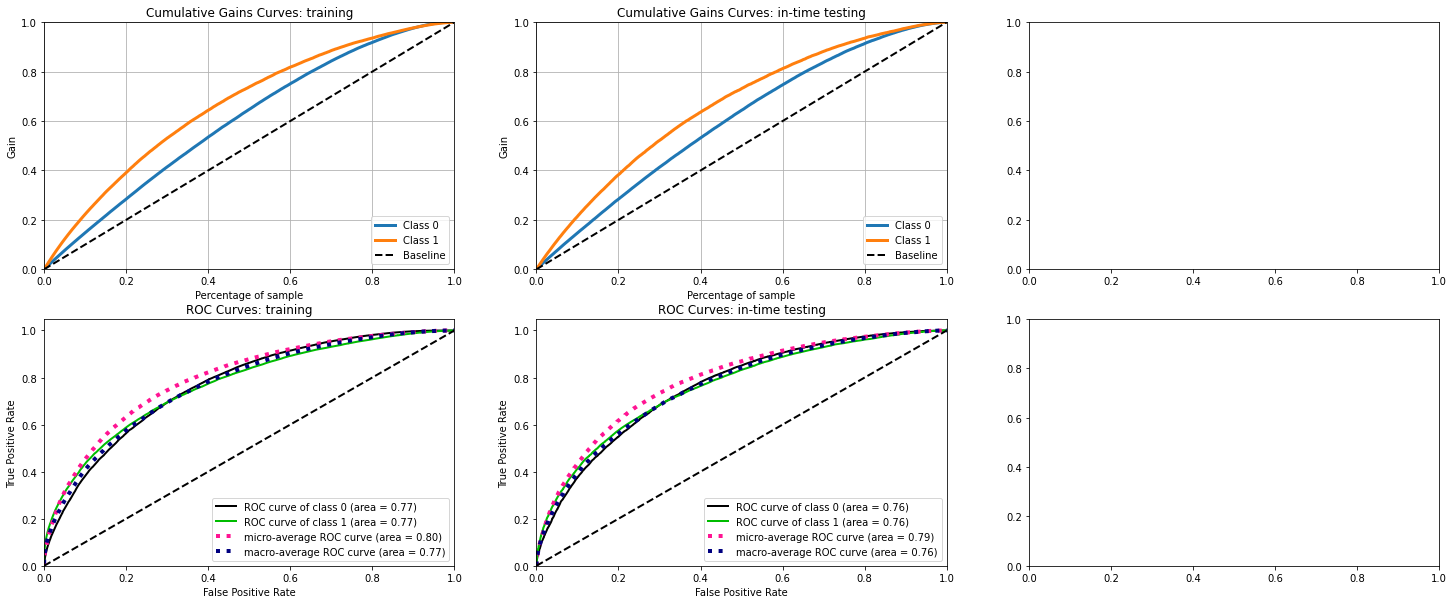

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25,10))
ax_f=axes.flatten()

_=skplt.metrics.plot_cumulative_gain(y_tr, y_tr_pred_lgbm, ax=ax_f[0], title='Cumulative Gains Curves: training')
_=skplt.metrics.plot_cumulative_gain(y_ts, y_ts_pred_lgbm, ax=ax_f[1], title='Cumulative Gains Curves: in-time testing')
# _=skplt.metrics.plot_cumulative_gain(y_oot, y_oot_pred_lgbm, ax=ax_f[2], title='Cumulative Gains Curves: oot testing')
_=skplt.metrics.plot_roc(y_tr, y_tr_pred_lgbm, ax=ax_f[3], title='ROC Curves: training')
_=skplt.metrics.plot_roc(y_ts, y_ts_pred_lgbm, ax=ax_f[4], title='ROC Curves: in-time testing')
# _=skplt.metrics.plot_roc(y_oot, y_oot_pred_lgbm, ax=ax_f[5], title='ROC Curves: oot testing')

In [55]:
df_model_pred = df_model.filter(F.col('member_no')!='None')
df_col_pred = df_model_pred.select(col_pred).toPandas()
df_member_no = df_model_pred.select('member_no').toPandas()
df_col_pred = df_col_pred.fillna(0)

In [56]:
pred = pd.concat([df_member_no,pd.DataFrame(pipeline_ev_lgbm.predict_proba(df_col_pred)[:, 1])],axis=1)

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [57]:
X_oot_2, y_oot_2=pd_oot[col_pred], pd_oot['ltv']

In [58]:
pred_1 = spark.createDataFrame(pred).withColumnRenamed('0','score')
pred_2 = pred_1.select('member_no','score', F.ntile(100).over(Window.partitionBy().orderBy(F.asc('score'))).alias('percentile'))
df_model_2 = df_model_pred.join(pred_2, on='member_no',how='left')
pd_model_2 = df_model_2.filter(F.col('percentile')<=20).fillna(0).toPandas()

In [59]:
class onehot_df(TransformerMixin, BaseEstimator):
    def __init__(self, col_to_code, handle_unknown='ignore'):
        self.col_to_code = col_to_code
        self.handle_unknown=handle_unknown
        
    def fit(self, X, y= None):
        # None in object columns may cause trouble
        self.enc = sk_OneHotEncoder(sparse=False, drop=None, handle_unknown=self.handle_unknown)
        self.enc.fit(X[self.col_to_code].fillna('missing').astype('category'))
        return self
    
    def transform(self, X, y= None):
        X_sparse=self.enc.transform(X[self.col_to_code].fillna('missing').astype('category'))
        X_oh=pd.DataFrame(X_sparse, columns=self.enc.get_feature_names(self.col_to_code)).reset_index(drop=True)
        # print(X_oh)
        X_dropped=X.drop(columns=self.col_to_code).reset_index(drop=True)
        X_res=pd.concat([X_dropped, X_oh], axis=1,  ignore_index=True)
        return X_res

In [60]:
pd_model_2= pd_model_2.fillna(0)
X_2, y_2=pd_model_2[col_pred], pd_model_2['ltv']
X_tr_2, X_ts_2, y_tr_2, y_ts_2 = train_test_split(X_2, y_2, test_size=0.25, random_state=42)

In [61]:
# param_test_2 ={'lgbm__num_leaves': [64, 68, 74, 80, 86, 92],
#              'lgbm__max_depth': [5, 6, 7, 8],
#              'lgbm__learning_rate': [0.001, 0.005, 0.01, 0.02, 0.05],
#              'lgbm__min_child_samples': [18, 19, 20, 21, 22],
#              'lgbm__min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
#              'lgbm__n_estimators': [100,300,500,1000],
#              'lgbm__colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9],
#              'lgbm__subsample': [0.5, 0.6, 0.7, 0.8, 0.9],
#              'lgbm__subsample_freq': [4, 6, 8, 10, 12, 14],
#              'lgbm__reg_alpha': [0, 0.1, 0.5, 0.8, 1, 1.2, 1.5, 1.8],
#              'lgbm__reg_lambda': [0, 0.1, 0.5, 0.8, 1, 1.2, 1.5, 1.8]}

In [62]:
# import lightgbm as lgb
# from sklearn.metrics import mean_squared_log_error
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from sklearn.model_selection import cross_val_score
# pipeline_ev_lgbm_2 = sk_pipeline([('onehot', onehot_df(col_to_code=col_to_code)),
#                               ('scaling', sk_StandardScaler()),
#                               ('lgbm', lgb.LGBMRegressor())])

# CV_2 = RandomizedSearchCV(pipeline_ev_lgbm_2, param_test_2, scoring = 'r2', n_jobs= 1)
# CV_2.fit(X_tr_2, y_tr_2)   

# print('Best score and parameter combination = ')

# print(CV_2.best_score_)    
# print(CV_2.best_params_)

In [63]:
from lightgbm import LGBMRegressor
pipeline_ev_lgbm_2 = sk_pipeline([('onehot', onehot_df(col_to_code=col_to_code)),
                              ('scaling', sk_StandardScaler()),
                              ('lgbm', LGBMRegressor(reg_lambda=125))])
pipeline_ev_lgbm_2.fit(X_tr_2, y_tr_2)

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Pipeline(steps=[('onehot',
                 onehot_df(col_to_code=['holiday_flag', 'is_member',
                                        'is_shopper', 'is_consumer', 'gender',
                                        'is_gwp', 'age_cohorts',
                                        'marital_status', 'city_grade',
                                        'educational_status', 'user_job',
                                        'monthly_pay', 'is_inside_staff',
                                        'chinese_zodiac', 'constellation',
                                        'prom_ind', 'most_freq_holiday'])),
                ('scaling', StandardScaler()),
                ('lgbm', LGBMRegressor(reg_lambda=125))])

In [64]:
y_tr_pred_lgbm_2=pipeline_ev_lgbm_2.predict(X_tr_2)
y_ts_pred_lgbm_2=pipeline_ev_lgbm_2.predict(X_ts_2)
y_tr_pred_lgbm_2
y_ts_pred_lgbm_2

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



array([ 40.50388,  80.68732, 158.00298, ...,  85.54237,  74.64325,
       119.8535 ])

array([104.44616,  76.88583,  63.96087, ...,  39.59591,  80.68732,
        98.94916])

In [65]:
# y_oot_pred_lgbm_2 = pipeline_ev_lgbm_2.predict(X_oot)

In [66]:
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y_tr_2, y_tr_pred_lgbm_2)
mse = metrics.mean_squared_error(y_tr_2, y_tr_pred_lgbm_2)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_tr_2,y_tr_pred_lgbm_2)
X = X_tr_2.values.reshape(-1, 1)
y = y_tr_2.values.reshape(-1, 1)
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
def mean_absolute_percentage_error(y_tr_2, y_tr_pred_lgbm_2): 
    y_tr_2, y_tr_pred_lgbm_2 = np.array(y_tr_2), np.array(y_tr_pred_lgbm_2)
    return np.mean(sum(np.abs((y_tr_2 - y_tr_pred_lgbm_2))) / sum(y_tr_2)) * 100
mape = mean_absolute_percentage_error(y_tr_2, y_tr_pred_lgbm_2)

print('Training results of sklearn.metrics:')
# print("MAE:",mae)
# print("MSE:", mse)
# print("RMSE:", rmse)
print("R-Squared:", r2)
print("Adjusted R-Squared:", adjusted_r_squared)
print("MAPE:", mape)

Training results of sklearn.metrics:
R-Squared: 0.08092515036008463
Adjusted R-Squared: 0.08090897060426394
MAPE: 161.89003548519162


In [67]:
mae = metrics.mean_absolute_error(y_ts_2, y_ts_pred_lgbm_2)
mse = metrics.mean_squared_error(y_ts_2, y_ts_pred_lgbm_2)
rmse = np.sqrt(mse)  
r2 = metrics.r2_score(y_ts_2,y_ts_pred_lgbm_2)
X = X_ts_2.values.reshape(-1, 1)
y = y_ts_2.values.reshape(-1, 1)
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
def mean_absolute_percentage_error(y_ts_2, y_ts_pred_lgbm_2): 
    y_ts_2, y_ts_pred_lgbm_2 = np.array(y_ts_2), np.array(y_ts_pred_lgbm_2)
    return np.mean(sum(np.abs((y_ts_2 - y_ts_pred_lgbm_2))) / sum(y_ts_2)) * 100
mape = mean_absolute_percentage_error(y_ts_2, y_ts_pred_lgbm_2)

print('Out-of-time testing results of sklearn.metrics:')
# print("MAE:",mae)
# print("MSE:", mse)
# print("RMSE:", rmse)
print("R-Squared:", r2)
print("Adjusted R-Squared:", adjusted_r_squared)
print("MAPE:", mape)

Out-of-time testing results of sklearn.metrics:
R-Squared: 0.02067590953657794
Adjusted R-Squared: 0.02062418649387887
MAPE: 165.16962275997423


In [68]:
# import sklearn.metrics as metrics
# mae = metrics.mean_absolute_error(y_oot_2, y_oot_pred_lgbm_2)
# mse = metrics.mean_squared_error(y_oot_2, y_oot_pred_lgbm_2)
# rmse = np.sqrt(mse)
# r2 = metrics.r2_score(y_oot_2,y_oot_pred_lgbm_2)
# X = X_tr_2.values.reshape(-1, 1)
# y = y_tr_2.values.reshape(-1, 1)
# adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
# def mean_absolute_percentage_error(y_oot_2, y_oot_pred_lgbm_2): 
#     y_oot_2, y_oot_pred_lgbm_2 = np.array(y_oot_2), np.array(y_oot_pred_lgbm_2)
#     return np.mean(sum(np.abs((y_oot_2 - y_oot_pred_lgbm_2))) / sum(y_oot_2)) * 100
# mape = mean_absolute_percentage_error(y_oot_2, y_oot_pred_lgbm_2)

# print('Results of sklearn.metrics:')
# print("MAE:",mae)
# print("MSE:", mse)
# print("RMSE:", rmse)
# print("R-Squared:", r2)
# print("Adjusted R-Squared:", adjusted_r_squared)
# print("MAPE:", mape)

In [69]:
df_oot_pred = df_oot.filter(F.col('member_no')!='None')
df_oot_col_pred = df_oot_pred.select(col_pred).toPandas()
df_oot_member_no = df_oot_pred.select('member_no').toPandas()
df_oot_col_pred = df_oot_col_pred.fillna(0)

In [70]:
pred_oot = pd.concat([df_oot_member_no,pd.DataFrame(pipeline_ev_lgbm.predict_proba(df_oot_col_pred)[:, 1])],axis=1)
pred_oot_1 = spark.createDataFrame(pred_oot).withColumnRenamed('0','score')
score_file = pred_oot_1.select('member_no','score', F.ntile(100).over(Window.partitionBy().orderBy(F.asc('score'))).alias('percentile'))
# score_file_binary = score_file.join(df_oot_pred, on = 'member_no', how='inner').drop('ltv','purch_ind','outcome_event_ind')
score_file_binary = score_file.join(df_oot_pred, on = 'member_no', how='inner').drop('purch_ind','outcome_event_ind')

/home/emr-notebook/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



MemoryError: Unable to allocate 884. MiB for an array with shape (122, 949986) and data type float64

In [ ]:
score_file_reg = score_file_binary.filter(F.col('percentile')<=20)
score_file_col_pred = score_file_reg.select(col_pred).toPandas()
score_file_member_no = score_file_reg.select('member_no').toPandas()
score_file_col_pred = score_file_col_pred.fillna(0)
df_reg = pd.concat([score_file_member_no,pd.DataFrame(pipeline_ev_lgbm_2.predict(score_file_col_pred))],axis=1).fillna(0)

In [ ]:
df_regression = spark.createDataFrame(df_reg).withColumnRenamed('0','predicted_ltv')
score_file_final = score_file_binary.join(df_regression, on='member_no',how='left').fillna(0,subset=['predicted_ltv'])
score_file_final.write.mode('overwrite').saveAsTable('default.lego_data_analysis')

In [ ]:
#regression (check spearman correlation)
#cumulative gain curve and auc(without pca check model performance)
#apply some automl, parameter tuning 
#check score logic , (probability * ltv )
#new features
score_file_final = score_file_binary.join(df_regression, on='member_no',how='left').fillna(0,subset=['ltv'])\
                            .withColumnRenamed('score','probability')\
                            .withColumnRenamed('percentile','probability_percentile')\
                            .withColumn('money', when(F.col('probability_percentile')<=10, F.col('ltv')).otherwise(F.lit(0)))\
                            .withColumn('money_percentile', F.ntile(100).over(Window.partitionBy().orderBy(F.asc('money'))))\
                            .withColumn('score', F.col('probability_percentile')*0.8+F.col('money_percentile')*0.2)\
                            .drop('ltv')

In [ ]:
score_file_final.select('member_no','score')\
            .write\
            .mode('overwrite').format('csv').save('hdfs://172.20.37.126:8020/user/hive/warehouse/default.db/lego_customer_score_file_oot')

In [ ]:
result_lgbm_tr = permutation_importance(pipeline_ev_lgbm_2, X_tr_2, y_tr_2, n_repeats=var_impr_repeat, random_state=0, n_jobs=-1)
sorted_idx_lgbm_tr = result_lgbm_tr.importances_mean.argsort()

result_lgbm_ts = permutation_importance(pipeline_ev_lgbm_2, X_ts_2, y_ts_2, n_repeats=var_impr_repeat, random_state=0, n_jobs=-1)
sorted_idx_lgbm_ts = result_lgbm_ts.importances_mean.argsort()

In [ ]:
# fig, ax = plt.subplots(figsize=(20,5))
fig, ax = plt.subplots(figsize=(15,5))
_=ax.boxplot(result_lgbm_tr.importances[sorted_idx_lgbm_tr[(-num_var_to_show):]].T,
           vert=False, labels=X_tr_2.columns[sorted_idx_lgbm_tr[(-num_var_to_show):]])
_=ax.set_title("Permutation Importances (training set)")
fig.tight_layout()
# plt.show()

fig, ax = plt.subplots(figsize=(15,5))
_=ax.boxplot(result_lgbm_ts.importances[sorted_idx_lgbm_ts[(-num_var_to_show):]].T,
           vert=False, labels=X_ts_2.columns[sorted_idx_lgbm_ts[(-num_var_to_show):]])
fig.tight_layout()
# plt.show()

In [ ]:
result_lgbm_tr = permutation_importance(pipeline_ev_lgbm_2, X_tr_2, y_tr_2, n_repeats=2, random_state=0, n_jobs=-1)
sorted_idx_lgbm_tr = result_lgbm_tr.importances_mean.argsort()

result_lgbm_ts = permutation_importance(pipeline_ev_lgbm_2, X_ts_2, y_ts_2, n_repeats=2, random_state=0, n_jobs=-1)
sorted_idx_lgbm_ts = result_lgbm_ts.importances_mean.argsort()

In [ ]:
# fig, ax = plt.subplots(figsize=(20,5))
fig, ax = plt.subplots(figsize=(15,5))
_=ax.boxplot(result_lgbm_tr.importances[sorted_idx_lgbm_tr[(-num_var_to_show):]].T,
           vert=False, labels=X_tr.columns[sorted_idx_lgbm_tr[(-num_var_to_show):]])
_=ax.set_title("Permutation Importances (training set)")
fig.tight_layout()
# plt.show()

fig, ax = plt.subplots(figsize=(15,5))
_=ax.boxplot(result_lgbm_ts.importances[sorted_idx_lgbm_ts[(-num_var_to_show):]].T,
           vert=False, labels=X_ts.columns[sorted_idx_lgbm_ts[(-num_var_to_show):]])
fig.tight_layout()
# plt.show()

In [ ]:
test2 = test.withColumn('tier',when(F.col('spend_year')>=5000,F.lit('tier3'))\
                                .when((F.col('spend_year')<5000) & (F.col('spend_year')>=1000),F.lit('tier2'))\
                                .when((F.col('spend_year')<1000) & (F.col('spend_year')>=1),F.lit('tier1'))\
                                .otherwise(F.lit('tier0')))\
            .withColumn('tier_after',when(F.col('ltv')>=2500,F.lit('tier3'))\
                                .when((F.col('ltv')<2500) & (F.col('ltv')>=500),F.lit('tier2'))\
                                .when((F.col('ltv')<500) & (F.col('ltv')>=1),F.lit('tier1'))\
                                .otherwise(F.lit('tier0')))